In [1]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [2]:
import seaborn as sns
import sklearn as sklearn
from sklearn.neighbors import KNeighborsClassifier
import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

import graphviz 
import statsmodels.api as sm
from sklearn import tree
import xgboost as xgb
from xgboost import plot_importance, XGBClassifier, plot_tree
from sklearn.decomposition import PCA

In [3]:
import pickle
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, f1_score, roc_auc_score 
from sklearn import preprocessing
from sklearn.utils import class_weight

In [4]:
from yellowbrick.classifier import ClassBalance, ROCAUC, ClassificationReport, ClassPredictionError

In [5]:
#data_set = r"C:\Users\A\Desktop\neural networks\WESAD-data\S2"
path = r"C:\Users\kssin\Downloads\WESAD\S6\S6.pkl"
#s2_path = data_set + 'S2/S2.pkl'

with open(path, 'rb') as file:
    data = pickle.load(file, encoding='latin1')

In [6]:
c_ax=data['signal']['chest']['ACC'][0:,0]#[baseline_to_plot]
c_ay=data['signal']['chest']['ACC'][0:,1]#[baseline_to_plot]#[0:100] # hundred values
c_az=data['signal']['chest']['ACC'][0:,2]#[baseline_to_plot]
c_ecg=data['signal']['chest']['ECG'][:,0]#[baseline_to_plot]
c_emg=data['signal']['chest']['EMG'][:,0]#[baseline_to_plot]
c_eda=data['signal']['chest']['EDA'][:,0]#[baseline_to_plot]
c_temp=data['signal']['chest']['Temp'][:,0]#[baseline_to_plot]
c_resp=data['signal']['chest']['Resp'][:,0]#[baseline_to_plot]
w_ax=data['signal']['wrist']['ACC'][0:,0]#[stress_to_plot]
w_ay=data['signal']['wrist']['ACC'][0:,1]#[stress_to_plot]
w_az=data['signal']['wrist']['ACC'][0:,2]#[stress_to_plot]
w_bvp=data['signal']['wrist']['BVP'][:,0]#[stress_to_plot]
w_eda=data['signal']['wrist']['EDA'][:,0]#[stress_to_plot]
w_temp=data['signal']['wrist']['TEMP'][:,0]#[stress_to_plot]
w_label=data['label']

print("Done")

Done


In [7]:
numpy_data1=np.array([c_ax, c_ay, c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label])
numpy_data1=numpy_data1.T

#df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_ax","w_ay","w_az","w_bvp","w_eda","w_temp"],orient='index') 
df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_label"]) 

print("data frame combined")

data frame combined


In [8]:
display(df.shape)
display(df.info)
display(df.describe)

(4949700, 9)

<bound method DataFrame.info of            c_ax    c_ay    c_az     c_ecg     c_emg      c_eda     c_temp  \
0        0.3510 -0.1906  2.2842  0.033371  0.055344   9.859848  33.037903   
1        0.4422 -0.1142  2.2216  0.036392  0.038773   9.861374  33.042389   
2        0.5322 -0.0582  1.9242  0.040466  0.016068   9.861755  33.051392   
3        0.6926 -0.0010  1.4022  0.042526  0.055206   9.859848  32.985321   
4        0.9018  0.0450  0.6478  0.046371  0.037308   9.859848  33.034882   
...         ...     ...     ...       ...       ...        ...        ...   
4949695  0.8808 -0.0614 -0.2410  1.459030 -0.036209  11.148453  33.835419   
4949696  0.8786 -0.0622 -0.2376  1.452438 -0.011078  11.147308  33.832397   
4949697  0.8798 -0.0638 -0.2402  1.446213 -0.016708  11.149597  33.829376   
4949698  0.8854 -0.0662 -0.2438  1.439621 -0.015244  11.145782  33.815674   
4949699  0.8838 -0.0674 -0.2478  1.432846 -0.014420  11.146927  33.835419   

           c_resp  w_label  
0        3.106

<bound method NDFrame.describe of            c_ax    c_ay    c_az     c_ecg     c_emg      c_eda     c_temp  \
0        0.3510 -0.1906  2.2842  0.033371  0.055344   9.859848  33.037903   
1        0.4422 -0.1142  2.2216  0.036392  0.038773   9.861374  33.042389   
2        0.5322 -0.0582  1.9242  0.040466  0.016068   9.861755  33.051392   
3        0.6926 -0.0010  1.4022  0.042526  0.055206   9.859848  32.985321   
4        0.9018  0.0450  0.6478  0.046371  0.037308   9.859848  33.034882   
...         ...     ...     ...       ...       ...        ...        ...   
4949695  0.8808 -0.0614 -0.2410  1.459030 -0.036209  11.148453  33.835419   
4949696  0.8786 -0.0622 -0.2376  1.452438 -0.011078  11.147308  33.832397   
4949697  0.8798 -0.0638 -0.2402  1.446213 -0.016708  11.149597  33.829376   
4949698  0.8854 -0.0662 -0.2438  1.439621 -0.015244  11.145782  33.815674   
4949699  0.8838 -0.0674 -0.2478  1.432846 -0.014420  11.146927  33.835419   

           c_resp  w_label  
0        3.1

## Concatenate classes 0, 1, 2, 3, and 4
Classes 5, 6 and 7 correspond to timed periods in which the participant answered questionnaires, therefore, only classes 0, 1, 2, 3, and 4 will be used. Additionally, the significant imbalance has been eliminated¶

In [9]:
loc0 = df.loc[df['w_label'] == 0]
loc1 = df.loc[df['w_label'] == 1]
loc2 = df.loc[df['w_label'] == 2]
loc3 = df.loc[df['w_label'] == 3]
loc4 = df.loc[df['w_label'] == 4]

In [10]:
c_loc = pd.concat([loc0, loc1, loc2, loc3, loc4])
c_loc

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
0,0.3510,-0.1906,2.2842,0.033371,0.055344,9.859848,33.037903,3.106689,0.0
1,0.4422,-0.1142,2.2216,0.036392,0.038773,9.861374,33.042389,3.111267,0.0
2,0.5322,-0.0582,1.9242,0.040466,0.016068,9.861755,33.051392,3.126526,0.0
3,0.6926,-0.0010,1.4022,0.042526,0.055206,9.859848,32.985321,3.147888,0.0
4,0.9018,0.0450,0.6478,0.046371,0.037308,9.859848,33.034882,3.175354,0.0
...,...,...,...,...,...,...,...,...,...
4826982,0.6486,-0.0264,-0.6948,-0.207687,-0.012955,8.293533,33.859741,-0.025940,4.0
4826983,0.6464,-0.0274,-0.6894,-0.206131,-0.008835,8.296585,33.896179,-0.025940,4.0
4826984,0.6494,-0.0282,-0.6910,-0.204163,-0.013229,8.296204,33.881012,-0.009155,4.0
4826985,0.6494,-0.0282,-0.6952,-0.200729,-0.005310,8.294296,33.900757,-0.022888,4.0


In [11]:
c_loc.describe().T

,count,mean,std,min,25%,50%,75%,max
c_ax,4825799.0,0.709269,0.125884,0.249000,0.592800,0.697400,0.831800,1.844200
c_ay,4825799.0,-0.052275,0.057826,-0.672800,-0.086200,-0.045600,-0.017400,0.559000
c_az,4825799.0,-0.408985,0.441019,-3.468600,-0.745800,-0.629400,-0.218200,2.284200
c_ecg,4825799.0,0.000707,0.303546,-0.713882,-0.090958,-0.025040,0.020142,1.499954
c_emg,4825799.0,-0.003930,0.017979,-0.444946,-0.011581,-0.003937,0.003525,0.473099
c_eda,4825799.0,8.263362,1.495500,5.171204,7.510757,8.224869,9.050369,12.174225
c_temp,4825799.0,33.968740,0.325125,32.878754,33.723114,33.985901,34.209961,35.226105
c_resp,4825799.0,0.049421,4.103593,-31.523132,-2.259827,-0.099182,2.369690,38.800049
w_label,4825799.0,0.978242,1.379674,0.000000,0.000000,0.000000,2.000000,4.000000


#### Plot all classes vs. classes 0,1,2,3,4

4949700 4825799
Number of Rows Removed: 123901


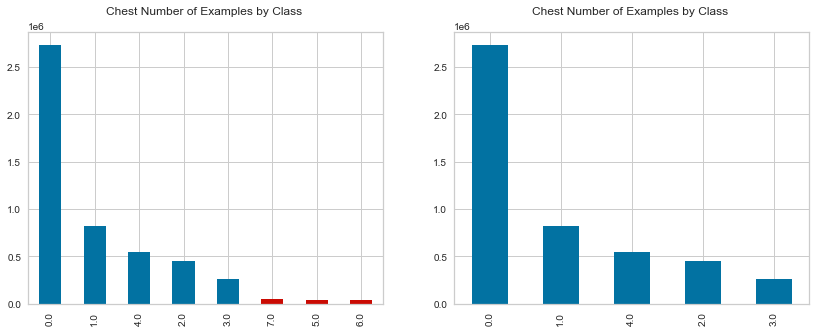

In [12]:
plt.figure(figsize = (14,5))
plt.subplot(1, 2, 1)
df['w_label'].value_counts().plot(kind='bar', 
                                     title='Chest Number of Examples by Class \n',
                                     color=['b','b','b','b','b','r','r','r'])
plt.subplot(1, 2, 2)
c_loc['w_label'].value_counts().plot(kind='bar', 
                                     title='Chest Number of Examples by Class \n')
print((df['w_label'].value_counts().sum()), c_loc['w_label'].value_counts().sum())
print('Number of Rows Removed:', (df['w_label'].value_counts().sum()) - 
      c_loc['w_label'].value_counts().sum());

# Calculating the interquartile range

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("IQR is\n", IQR)
#print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)) )

IQR is
 c_ax       0.232800
c_ay       0.068800
c_az       0.514000
c_ecg      0.111053
c_emg      0.015106
c_eda      1.593399
c_temp     0.491333
c_resp     4.670715
w_label    2.000000
dtype: float64


In [14]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(3298209, 9)


In [15]:
#mean normalization 
norm_df_out=(df_out-df_out.mean())/df_out.std()
#min-max normalization:
#norm_df_out=(df_out-df_out.min())/(df_out.max()-df_out.min())

norm_y = df_out.w_label #keep original labels Dont normalize labels
norm_x = norm_df_out.drop('w_label',axis=1)

norm_x_train,norm_x_test,norm_y_train,norm_y_test=train_test_split(norm_x,norm_y,test_size=0.2)

In [16]:
norm_df_out.head()

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
5,3.720130,2.587664,0.505482,0.904048,0.226782,1.310734,-2.989964,0.979081,-0.815223
42,1.301342,1.964839,0.452730,0.765867,-0.527003,1.309641,-3.019642,1.093801,-0.815223
44,1.059953,0.645914,0.547587,0.799183,1.995607,1.309367,-3.108776,1.100912,-0.815223
45,1.015916,0.270388,0.567914,0.835777,-0.655489,1.309641,-2.989964,1.116555,-0.815223
48,1.042013,0.068885,0.509838,1.147094,-1.760469,1.309641,-3.044390,1.112763,-0.815223


In [17]:
norm_df_out.describe()

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
count,3.298209e+06,3.298209e+06,3.298209e+06,3.298209e+06,3.298209e+06,3.298209e+06,3.298209e+06,3.298209e+06,3.298209e+06
mean,1.003923e-13,-1.054926e-13,-1.428477e-13,-2.279896e-16,3.602352e-15,4.963238e-14,3.573973e-13,3.019412e-17,6.223237e-12
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.719096e+00,-3.223846e+00,-1.354405e+00,-2.738913e+00,-2.835469e+00,-1.999790e+00,-3.207770e+00,-2.892949e+00,-8.152226e-01
25%,-9.576053e-01,-6.775895e-01,-7.039527e-01,-4.253323e-01,-5.998116e-01,-7.311156e-01,-7.856536e-01,-6.592313e-01,-8.152226e-01
50%,-1.078493e-01,1.238395e-01,-4.547093e-01,9.243781e-02,4.072974e-03,4.998541e-02,7.057787e-02,-3.822749e-02,-1.445379e-01
75%,8.136703e-01,6.917097e-01,3.510965e-01,5.211821e-01,5.951089e-01,5.736347e-01,7.940135e-01,6.756899e-01,5.261469e-01
max,3.966413e+00,3.077681e+00,2.454419e+00,2.561131e+00,2.817918e+00,2.478286e+00,3.266934e+00,2.910830e+00,2.538201e+00


In [18]:
norm_df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3298209 entries, 5 to 4949677
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   c_ax     float64
 1   c_ay     float64
 2   c_az     float64
 3   c_ecg    float64
 4   c_emg    float64
 5   c_eda    float64
 6   c_temp   float64
 7   c_resp   float64
 8   w_label  float64
dtypes: float64(9)
memory usage: 251.6 MB


In [19]:
norm_df_out.shape

(3298209, 9)

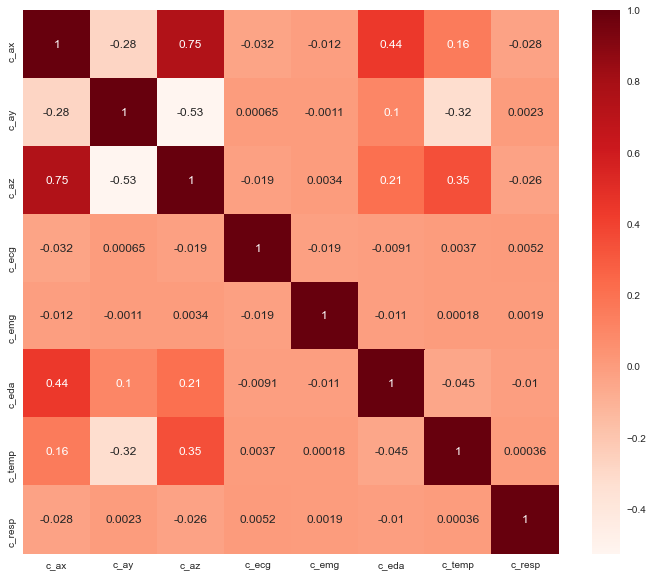

In [20]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = norm_x.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [21]:
X_1 = sm.add_constant(norm_x)
#Fitting sm.OLS model
model = sm.OLS(norm_y,X_1).fit()
model.pvalues

const      0.000000e+00
c_ax       0.000000e+00
c_ay       0.000000e+00
c_az       0.000000e+00
c_ecg     5.475545e-120
c_emg      4.339680e-61
c_eda      0.000000e+00
c_temp     0.000000e+00
c_resp     4.096378e-10
dtype: float64

In [22]:
norm_x_train

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp
1742048,0.839767,1.928202,-0.175944,-2.227151,0.295308,0.512141,-0.360304,0.676638
3542056,0.761478,-1.584350,2.338267,-2.068761,0.363834,-0.100331,1.257290,0.724991
2006266,0.277069,1.126773,-0.302744,1.137263,-0.175808,1.666302,-0.890582,-1.712568
690480,-0.980439,-0.100560,-0.702017,-0.020620,-0.432780,-0.823492,-1.519250,-0.325975
4318883,1.412251,-0.938626,1.838813,-0.007511,1.815727,0.109566,0.965038,0.222499
...,...,...,...,...,...,...,...,...
4888302,1.400834,-0.773761,0.373843,0.768051,-0.252899,0.570902,0.311522,1.089060
3956445,-0.106218,-0.068503,-0.437771,-0.086706,0.937738,0.297325,0.954978,1.453130
3689151,1.074632,-1.332472,2.114674,0.254651,-0.467043,0.574181,1.706381,1.146894
2811750,-1.172898,-1.021059,-0.755253,0.222427,0.954870,-0.828685,0.507396,0.607427


In [23]:
norm_y_train

1742048    2.0
3542056    0.0
2006266    2.0
690480     1.0
4318883    0.0
          ... 
4888302    0.0
3956445    3.0
3689151    0.0
2811750    0.0
936133     1.0
Name: w_label, Length: 2638567, dtype: float64

In [24]:
norm_x_test

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp
3765117,0.004691,-1.272938,-0.366143,0.279774,-0.758278,0.763854,1.065742,0.846821
1652239,1.260567,2.422799,0.294956,1.758806,-1.554891,0.908158,-1.224886,0.952060
2168740,0.118861,1.332853,-0.353560,0.615670,0.612240,2.022416,-1.269956,0.021503
1762937,0.526613,1.351172,-0.164329,1.001813,-0.407082,0.499569,-0.305275,2.674279
4682700,-0.409587,0.403196,-0.537952,-0.089437,-0.162959,0.651526,0.196130,-0.492840
...,...,...,...,...,...,...,...,...
3526380,1.048536,-2.935332,2.340687,-1.138086,-0.865349,-0.092132,1.126305,0.743953
794261,-0.905413,0.050566,-0.705889,0.500428,0.603675,-1.082037,-0.880522,-0.209833
576342,-0.773302,-0.324961,-0.649748,0.456734,0.248197,-0.218399,-1.130219,-0.394712
649670,-1.086455,-0.100560,-0.746058,1.276537,-1.888955,-0.673449,-1.708585,0.269904


In [25]:
norm_y_test

3765117    0.0
1652239    0.0
2168740    0.0
1762937    2.0
4682700    4.0
          ... 
3526380    0.0
794261     1.0
576342     1.0
649670     1.0
3235324    4.0
Name: w_label, Length: 659642, dtype: float64

In [26]:
y=df_out.w_label
x=df_out.drop('w_label',axis=1)
#print(x)
#print("\n-----\n")
#print(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(y_test.shape)
y

(2638567, 8)
(659642,)


5          0.0
42         0.0
44         0.0
45         0.0
48         0.0
          ... 
4949665    0.0
4949666    0.0
4949667    0.0
4949668    0.0
4949677    0.0
Name: w_label, Length: 3298209, dtype: float64

In [27]:
(x_train)

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp
2104402,0.7178,-0.0014,-0.6130,-0.207092,-0.021194,10.230637,33.606476,3.633118
2655482,0.5538,-0.0524,-0.7874,-0.045547,0.002792,5.533218,33.999603,3.280640
635168,0.5626,-0.0446,-0.7746,-0.023026,-0.000412,7.177353,33.441620,2.447510
2630127,0.5522,-0.1058,-0.7922,-0.028748,-0.006042,5.347443,34.020935,-0.611877
392237,0.8590,-0.0538,-0.3942,-0.150192,0.002380,9.746933,33.711029,-5.360413
...,...,...,...,...,...,...,...,...
3558395,0.7830,-0.1128,0.4766,-0.062073,-0.030167,7.864761,34.335205,-1.411438
4346646,0.8750,-0.0134,-0.3062,-0.049484,0.024353,8.443069,34.101654,6.297302
1368366,0.8974,-0.0418,-0.2230,-0.009338,-0.008194,7.082748,33.586792,-1.882935
212308,0.7554,-0.1304,0.5390,-0.153625,-0.017578,7.509232,34.390289,2.806091


In [28]:
(y_train)

2104402    2.0
2655482    0.0
635168     1.0
2630127    0.0
392237     0.0
          ... 
3558395    0.0
4346646    0.0
1368366    0.0
212308     0.0
3652314    0.0
Name: w_label, Length: 2638567, dtype: float64

In [29]:
(x_test)

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp
1974888,0.6934,-0.0036,-0.6326,0.012314,-0.004440,9.645844,33.751953,-1.567078
2842752,0.8360,0.0162,-0.4518,-0.101212,-0.021744,7.139969,33.978302,1.994324
1041590,0.6126,-0.0310,-0.7266,0.079788,-0.009842,6.216431,33.911377,-1.741028
3092699,0.9174,-0.1566,0.1462,-0.023117,-0.003250,7.445145,34.217560,2.836609
3385103,0.5114,-0.0114,-0.8122,0.128403,0.008011,7.645798,34.033112,2.330017
...,...,...,...,...,...,...,...,...
4928838,0.8938,-0.0162,-0.2208,0.154861,0.001236,10.881042,33.949402,-1.875305
140036,0.8060,-0.1066,0.4906,0.000687,-0.001282,10.030746,34.057465,6.556702
2755182,0.5428,-0.0882,-0.7918,-0.072372,-0.000961,5.969620,34.091003,-3.839111
2097464,0.7012,0.0136,-0.6204,0.027649,-0.004211,10.054016,33.662506,3.547668


In [30]:
(y_test)

1974888    2.0
2842752    0.0
1041590    1.0
3092699    0.0
3385103    4.0
          ... 
4928838    0.0
140036     0.0
2755182    0.0
2097464    2.0
4666616    4.0
Name: w_label, Length: 659642, dtype: float64

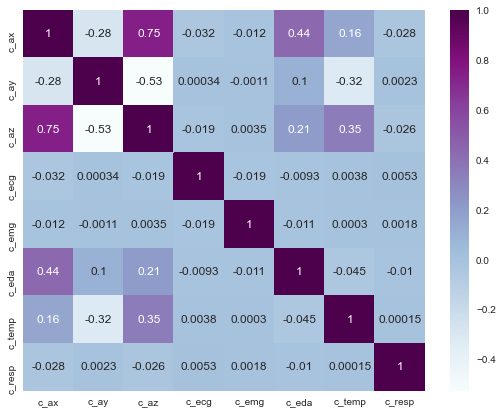

In [31]:
plt.figure(figsize=(9,7))
sns.heatmap(x_train.corr(), annot=True, cmap=plt.cm.BuPu);

# XGBoost 
(colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 10, early_stopping_rounds = 20, alpha = 10, n_estimators = 300, gradient_based = 0.1, gamma=3, verbosity = 2)

In [32]:
evalSet = [(x_train, y_train), (x_test, y_test)] 

In [33]:
xg_class = XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, early_stopping_rounds = 20, alpha = 10, n_estimators = 300, gradient_based = 0.1, gamma=3, verbosity = 2) 

xg_allChest = xg_class.fit(x_train,y_train, 
                              eval_metric='merror', 
                              eval_set = evalSet) 

C:\Users\kssin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[14:21:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gradient_based" } are not used.

[14:21:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 326 extra nodes, 52 pruned nodes, max_depth=10
[14:21:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 464 extra nodes, 258 pruned nodes, max_depth=10
[14:21:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 424 extra nodes, 164 pruned nodes, max_depth=10
[14:21:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/

[14:22:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 304 extra nodes, 98 pruned nodes, max_depth=10
[14:22:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 138 extra nodes, 60 pruned nodes, max_depth=10
[5]	validation_0-merror:0.08844	validation_1-merror:0.08950
[14:22:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 468 extra nodes, 118 pruned nodes, max_depth=10
[14:22:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 370 extra nodes, 116 pruned nodes, max_depth=10
[14:22:25] INFO: C:/buildkite-

[14:23:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 346 extra nodes, 144 pruned nodes, max_depth=10
[14:23:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 160 extra nodes, 236 pruned nodes, max_depth=10
[14:23:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 104 extra nodes, 96 pruned nodes, max_depth=10
[11]	validation_0-merror:0.05164	validation_1-merror:0.05203
[14:23:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 424 extra nodes, 302 pruned nodes, max_depth=10
[14:23:11] INFO: C:/buildkit

[14:23:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 288 extra nodes, 100 pruned nodes, max_depth=10
[14:23:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 178 extra nodes, 64 pruned nodes, max_depth=10
[14:23:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 516 extra nodes, 254 pruned nodes, max_depth=10
[14:23:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 80 pruned nodes, max_depth=10
[17]	validation_0-merror:0.03846	validation_1-merror:0.03871
[14:23:58] INFO: C:/buildkite-

[14:24:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 280 extra nodes, 90 pruned nodes, max_depth=10
[14:24:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 132 extra nodes, 468 pruned nodes, max_depth=10
[14:24:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 128 extra nodes, 46 pruned nodes, max_depth=10
[14:24:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 232 extra nodes, 114 pruned nodes, max_depth=10
[14:24:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03022

[28]	validation_0-merror:0.02952	validation_1-merror:0.02985
[14:25:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 464 extra nodes, 118 pruned nodes, max_depth=10
[14:25:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 180 extra nodes, 34 pruned nodes, max_depth=10
[14:25:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 428 extra nodes, 206 pruned nodes, max_depth=10
[14:25:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 132 extra nodes, 148 pruned nodes, max_depth=10
[14:25:32] INFO: C:/buildkit

[14:26:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 92 pruned nodes, max_depth=8
[34]	validation_0-merror:0.02389	validation_1-merror:0.02430
[14:26:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 96 extra nodes, 160 pruned nodes, max_depth=10
[14:26:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 244 extra nodes, 142 pruned nodes, max_depth=10
[14:26:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 232 extra nodes, 182 pruned nodes, max_depth=10
[14:26:19] INFO: C:/buildkite-a

[14:27:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 204 extra nodes, 66 pruned nodes, max_depth=10
[14:27:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 16 pruned nodes, max_depth=5
[40]	validation_0-merror:0.02060	validation_1-merror:0.02096
[14:27:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 198 extra nodes, 382 pruned nodes, max_depth=10
[14:27:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 292 extra nodes, 282 pruned nodes, max_depth=10
[14:27:14] INFO: C:/buildkite-a

[14:27:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 110 pruned nodes, max_depth=10
[14:27:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 326 extra nodes, 258 pruned nodes, max_depth=10
[14:27:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 112 pruned nodes, max_depth=10
[46]	validation_0-merror:0.01881	validation_1-merror:0.01918
[14:27:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 324 extra nodes, 220 pruned nodes, max_depth=10
[14:28:01] INFO: C:/buildkit

[14:28:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 94 extra nodes, 220 pruned nodes, max_depth=10
[14:28:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 92 pruned nodes, max_depth=9
[14:28:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 168 extra nodes, 500 pruned nodes, max_depth=10
[14:28:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 22 pruned nodes, max_depth=5
[52]	validation_0-merror:0.01819	validation_1-merror:0.01851
[14:28:49] INFO: C:/buildkite-agen

[14:29:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 200 extra nodes, 116 pruned nodes, max_depth=10
[14:29:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 318 extra nodes, 334 pruned nodes, max_depth=10
[14:29:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 108 extra nodes, 46 pruned nodes, max_depth=10
[14:29:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 114 extra nodes, 68 pruned nodes, max_depth=10
[14:29:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03022

[63]	validation_0-merror:0.01541	validation_1-merror:0.01572
[14:30:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 158 extra nodes, 352 pruned nodes, max_depth=10
[14:30:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 150 extra nodes, 216 pruned nodes, max_depth=10
[14:30:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 88 extra nodes, 244 pruned nodes, max_depth=10
[14:30:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 152 pruned nodes, max_depth=7
[14:30:25] INFO: C:/buildkite-

[14:31:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 114 pruned nodes, max_depth=7
[69]	validation_0-merror:0.01462	validation_1-merror:0.01495
[14:31:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 270 pruned nodes, max_depth=10
[14:31:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 230 extra nodes, 202 pruned nodes, max_depth=10
[14:31:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 138 extra nodes, 54 pruned nodes, max_depth=10
[14:31:12] INFO: C:/buildkite-a

[14:31:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 150 extra nodes, 166 pruned nodes, max_depth=10
[14:31:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 36 pruned nodes, max_depth=10
[75]	validation_0-merror:0.01345	validation_1-merror:0.01367
[14:31:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 288 extra nodes, 64 pruned nodes, max_depth=10
[14:31:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 278 pruned nodes, max_depth=7
[14:31:58] INFO: C:/buildkite-ag

[14:32:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 132 extra nodes, 164 pruned nodes, max_depth=10
[14:32:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 180 pruned nodes, max_depth=10
[14:32:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 28 pruned nodes, max_depth=9
[81]	validation_0-merror:0.01180	validation_1-merror:0.01210
[14:32:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 306 extra nodes, 202 pruned nodes, max_depth=10
[14:32:45] INFO: C:/buildkite-a

[14:33:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 206 pruned nodes, max_depth=9
[14:33:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 150 extra nodes, 72 pruned nodes, max_depth=10
[14:33:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 186 extra nodes, 194 pruned nodes, max_depth=10
[14:33:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 22 pruned nodes, max_depth=10
[87]	validation_0-merror:0.01108	validation_1-merror:0.01143
[14:33:32] INFO: C:/buildkite-ag

[14:34:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 236 pruned nodes, max_depth=6
[14:34:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 250 pruned nodes, max_depth=9
[14:34:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 178 pruned nodes, max_depth=4
[14:34:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 150 extra nodes, 74 pruned nodes, max_depth=10
[14:34:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e

[98]	validation_0-merror:0.00967	validation_1-merror:0.01008
[14:35:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 286 pruned nodes, max_depth=9
[14:35:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 138 extra nodes, 180 pruned nodes, max_depth=10
[14:35:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 164 extra nodes, 222 pruned nodes, max_depth=10
[14:35:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 116 pruned nodes, max_depth=10
[14:35:07] INFO: C:/buildkite-

[14:35:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 48 pruned nodes, max_depth=10
[104]	validation_0-merror:0.00927	validation_1-merror:0.00965
[14:35:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 470 pruned nodes, max_depth=10
[14:35:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 96 extra nodes, 192 pruned nodes, max_depth=10
[14:35:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 98 pruned nodes, max_depth=8
[14:35:54] INFO: C:/buildkite-age

[14:36:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 154 extra nodes, 116 pruned nodes, max_depth=10
[14:36:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 26 pruned nodes, max_depth=9
[110]	validation_0-merror:0.00874	validation_1-merror:0.00910
[14:36:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 260 extra nodes, 78 pruned nodes, max_depth=10
[14:36:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 226 pruned nodes, max_depth=7
[14:36:42] INFO: C:/buildkite-ag

[14:37:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 102 extra nodes, 50 pruned nodes, max_depth=10
[14:37:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 178 pruned nodes, max_depth=9
[14:37:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 32 pruned nodes, max_depth=5
[116]	validation_0-merror:0.00828	validation_1-merror:0.00868
[14:37:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 212 extra nodes, 126 pruned nodes, max_depth=10
[14:37:39] INFO: C:/buildkite-ag

[14:38:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 134 extra nodes, 210 pruned nodes, max_depth=10
[14:38:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 86 pruned nodes, max_depth=7
[14:38:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 50 pruned nodes, max_depth=10
[14:38:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 90 pruned nodes, max_depth=9
[122]	validation_0-merror:0.00797	validation_1-merror:0.00833
[14:38:26] INFO: C:/buildkite-age

[14:39:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 106 extra nodes, 246 pruned nodes, max_depth=10
[14:39:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 116 extra nodes, 226 pruned nodes, max_depth=10
[14:39:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 86 pruned nodes, max_depth=10
[14:39:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 196 pruned nodes, max_depth=6
[14:39:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e

[133]	validation_0-merror:0.00724	validation_1-merror:0.00762
[14:39:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 242 extra nodes, 152 pruned nodes, max_depth=10
[14:39:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 102 extra nodes, 152 pruned nodes, max_depth=10
[14:39:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 84 extra nodes, 158 pruned nodes, max_depth=10
[14:39:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 186 pruned nodes, max_depth=9
[14:39:59] INFO: C:/buildkite

[14:40:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 92 pruned nodes, max_depth=8
[139]	validation_0-merror:0.00693	validation_1-merror:0.00734
[14:40:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 164 extra nodes, 196 pruned nodes, max_depth=10
[14:40:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 110 extra nodes, 216 pruned nodes, max_depth=10
[14:40:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 150 pruned nodes, max_depth=6
[14:40:46] INFO: C:/buildkite-a

[14:41:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 144 extra nodes, 118 pruned nodes, max_depth=10
[14:41:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 118 pruned nodes, max_depth=10
[145]	validation_0-merror:0.00670	validation_1-merror:0.00712
[14:41:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 236 extra nodes, 158 pruned nodes, max_depth=10
[14:41:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 162 extra nodes, 314 pruned nodes, max_depth=10
[14:41:34] INFO: C:/buildki

[14:42:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 190 pruned nodes, max_depth=10
[14:42:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 176 extra nodes, 278 pruned nodes, max_depth=10
[14:42:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 92 pruned nodes, max_depth=10
[151]	validation_0-merror:0.00636	validation_1-merror:0.00677
[14:42:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 270 extra nodes, 246 pruned nodes, max_depth=10
[14:42:22] INFO: C:/buildkite

[14:43:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 84 extra nodes, 90 pruned nodes, max_depth=10
[14:43:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 134 pruned nodes, max_depth=5
[14:43:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 226 extra nodes, 162 pruned nodes, max_depth=10
[14:43:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 70 pruned nodes, max_depth=3
[157]	validation_0-merror:0.00606	validation_1-merror:0.00649
[14:43:18] INFO: C:/buildkite-agen

[14:43:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 142 extra nodes, 132 pruned nodes, max_depth=10
[14:44:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 154 pruned nodes, max_depth=5
[14:44:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 262 pruned nodes, max_depth=7
[14:44:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 252 pruned nodes, max_depth=8
[14:44:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36

[168]	validation_0-merror:0.00574	validation_1-merror:0.00618
[14:44:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 110 extra nodes, 684 pruned nodes, max_depth=10
[14:44:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 164 pruned nodes, max_depth=0
[14:44:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 134 extra nodes, 110 pruned nodes, max_depth=10
[14:44:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 58 pruned nodes, max_depth=9
[14:44:51] INFO: C:/buildkite-ag

[14:45:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 54 pruned nodes, max_depth=6
[174]	validation_0-merror:0.00557	validation_1-merror:0.00602
[14:45:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 280 pruned nodes, max_depth=3
[14:45:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 174 pruned nodes, max_depth=0
[14:45:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 182 pruned nodes, max_depth=0
[14:45:45] INFO: C:/buildkite-agent/bu

[14:46:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 114 extra nodes, 218 pruned nodes, max_depth=10
[14:46:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 44 pruned nodes, max_depth=6
[180]	validation_0-merror:0.00538	validation_1-merror:0.00583
[14:46:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 332 pruned nodes, max_depth=6
[14:46:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 112 extra nodes, 272 pruned nodes, max_depth=10
[14:46:38] INFO: C:/buildkite-a

[14:47:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 148 pruned nodes, max_depth=10
[14:47:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 148 extra nodes, 294 pruned nodes, max_depth=10
[14:47:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 58 pruned nodes, max_depth=9
[186]	validation_0-merror:0.00518	validation_1-merror:0.00564
[14:47:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 398 pruned nodes, max_depth=6
[14:47:30] INFO: C:/buildkite-ag

[14:48:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 146 extra nodes, 112 pruned nodes, max_depth=10
[14:48:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 168 pruned nodes, max_depth=6
[14:48:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 128 pruned nodes, max_depth=10
[14:48:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 104 pruned nodes, max_depth=6
[192]	validation_0-merror:0.00489	validation_1-merror:0.00536
[14:48:22] INFO: C:/buildkite-a

[14:49:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 176 pruned nodes, max_depth=3
[14:49:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 92 extra nodes, 212 pruned nodes, max_depth=10
[14:49:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 64 pruned nodes, max_depth=9
[14:49:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 182 pruned nodes, max_depth=6
[14:49:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a

[203]	validation_0-merror:0.00468	validation_1-merror:0.00515
[14:49:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 134 extra nodes, 316 pruned nodes, max_depth=10
[14:50:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 100 pruned nodes, max_depth=7
[14:50:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 230 pruned nodes, max_depth=5
[14:50:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 188 pruned nodes, max_depth=5
[14:50:04] INFO: C:/buildkite-ag

[14:50:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 64 pruned nodes, max_depth=6
[209]	validation_0-merror:0.00459	validation_1-merror:0.00504
[14:50:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 378 pruned nodes, max_depth=9
[14:50:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 158 pruned nodes, max_depth=8
[14:50:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 216 pruned nodes, max_depth=6
[14:50:50] INFO: C:/buildkite-agent

[14:51:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 290 pruned nodes, max_depth=5
[14:51:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 62 pruned nodes, max_depth=6
[215]	validation_0-merror:0.00449	validation_1-merror:0.00492
[14:51:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 258 pruned nodes, max_depth=4
[14:51:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 186 pruned nodes, max_depth=10
[14:51:36] INFO: C:/buildkite-agent

[14:52:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 80 pruned nodes, max_depth=10
[14:52:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 116 pruned nodes, max_depth=10
[14:52:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 92 pruned nodes, max_depth=4
[221]	validation_0-merror:0.00439	validation_1-merror:0.00482
[14:52:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 194 extra nodes, 80 pruned nodes, max_depth=10
[14:52:22] INFO: C:/buildkite-age

[14:53:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 194 pruned nodes, max_depth=10
[14:53:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 122 pruned nodes, max_depth=7
[14:53:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 78 extra nodes, 162 pruned nodes, max_depth=10
[14:53:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 70 pruned nodes, max_depth=5
[227]	validation_0-merror:0.00424	validation_1-merror:0.00468
[14:53:08] INFO: C:/buildkite-age

[14:53:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 76 extra nodes, 274 pruned nodes, max_depth=10
[14:53:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 132 pruned nodes, max_depth=1
[14:53:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 106 pruned nodes, max_depth=5
[14:53:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 246 pruned nodes, max_depth=7
[14:53:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1

[238]	validation_0-merror:0.00403	validation_1-merror:0.00444
[14:54:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 144 extra nodes, 272 pruned nodes, max_depth=10
[14:54:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 154 pruned nodes, max_depth=9
[14:54:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 214 pruned nodes, max_depth=10
[14:54:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 82 pruned nodes, max_depth=10
[14:54:42] INFO: C:/buildkite-a

[14:55:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 106 pruned nodes, max_depth=0
[244]	validation_0-merror:0.00397	validation_1-merror:0.00440
[14:55:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 312 pruned nodes, max_depth=0
[14:55:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 100 extra nodes, 200 pruned nodes, max_depth=10
[14:55:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 140 pruned nodes, max_depth=1
[14:55:39] INFO: C:/buildkite-agent

[14:56:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 224 pruned nodes, max_depth=6
[14:56:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 38 pruned nodes, max_depth=0
[250]	validation_0-merror:0.00385	validation_1-merror:0.00427
[14:56:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 86 extra nodes, 266 pruned nodes, max_depth=10
[14:56:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 132 pruned nodes, max_depth=10
[14:56:26] INFO: C:/buildkite-agen

[14:57:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 86 pruned nodes, max_depth=10
[14:57:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 116 pruned nodes, max_depth=10
[14:57:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 48 pruned nodes, max_depth=4
[256]	validation_0-merror:0.00377	validation_1-merror:0.00417
[14:57:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 260 pruned nodes, max_depth=2
[14:57:15] INFO: C:/buildkite-agent

[14:57:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 142 pruned nodes, max_depth=5
[14:57:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 134 pruned nodes, max_depth=7
[14:58:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 212 pruned nodes, max_depth=4
[14:58:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 42 pruned nodes, max_depth=10
[262]	validation_0-merror:0.00370	validation_1-merror:0.00413
[14:58:04] INFO: C:/buildkite-agent

[14:58:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 114 pruned nodes, max_depth=10
[14:58:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 162 pruned nodes, max_depth=6
[14:58:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 114 pruned nodes, max_depth=6
[14:58:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 232 pruned nodes, max_depth=9
[14:58:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e

[273]	validation_0-merror:0.00357	validation_1-merror:0.00401
[14:59:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 324 pruned nodes, max_depth=0
[14:59:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 156 pruned nodes, max_depth=0
[14:59:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 78 extra nodes, 164 pruned nodes, max_depth=10
[14:59:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 64 pruned nodes, max_depth=0
[14:59:37] INFO: C:/buildkite-agent/b

[15:00:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 72 pruned nodes, max_depth=3
[279]	validation_0-merror:0.00349	validation_1-merror:0.00392
[15:00:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 104 extra nodes, 206 pruned nodes, max_depth=10
[15:00:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 94 extra nodes, 154 pruned nodes, max_depth=10
[15:00:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 184 pruned nodes, max_depth=7
[15:00:28] INFO: C:/buildkite-age

[15:01:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 240 pruned nodes, max_depth=10
[15:01:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 110 pruned nodes, max_depth=8
[285]	validation_0-merror:0.00345	validation_1-merror:0.00389
[15:01:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 436 pruned nodes, max_depth=8
[15:01:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 68 pruned nodes, max_depth=8
[15:01:20] INFO: C:/buildkite-agen

[15:02:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 64 pruned nodes, max_depth=1
[15:02:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 144 pruned nodes, max_depth=1
[15:02:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 70 pruned nodes, max_depth=0
[291]	validation_0-merror:0.00341	validation_1-merror:0.00384
[15:02:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 302 pruned nodes, max_depth=6
[15:02:08] INFO: C:/buildkite-agent/bui

[15:02:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 96 pruned nodes, max_depth=10
[15:02:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 118 pruned nodes, max_depth=1
[15:02:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 96 pruned nodes, max_depth=1
[15:02:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 88 pruned nodes, max_depth=0
[297]	validation_0-merror:0.00338	validation_1-merror:0.00380
[15:02:54] INFO: C:/buildkite-agent/bui

In [34]:
xg_class_pred = xg_class.predict(x_test)
xg_class_report = (classification_report(y_test,
                                         xg_class_pred,
                                         labels=np.unique(xg_class_pred),
                                         digits=4))

print('----------------------------------------')
print('Balanced Accuracy: {0:.4f}'.format(balanced_accuracy_score(y_test, xg_class_pred)))
print('----------------------------------------')
print('------------Classification Report------------')
print(xg_class_report)

----------------------------------------
Balanced Accuracy: 0.9956
----------------------------------------
------------Classification Report------------
              precision    recall  f1-score   support

           0     0.9974    0.9950    0.9962    316235
           1     0.9962    0.9978    0.9970    132215
           2     0.9943    0.9969    0.9956     69649
           3     0.9953    0.9974    0.9964     41817
           4     0.9951    0.9978    0.9964     92741
           5     0.9829    0.9888    0.9859      6985

    accuracy                         0.9962    659642
   macro avg     0.9935    0.9956    0.9946    659642
weighted avg     0.9962    0.9962    0.9962    659642



# QDA + Normalization + Cross Validation = 10

In [35]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0)
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.8837    0.8392    0.8608   1581901
         1.0     0.7640    0.8261    0.7938    662447
         2.0     0.9072    0.9269    0.9169    347443
         3.0     0.9137    0.9144    0.9141    208216
         4.0     0.9042    0.9263    0.9151    463992
         5.0     0.7871    0.9452    0.8589     34210

    accuracy                         0.8639   3298209
   macro avg     0.8600    0.8963    0.8766   3298209
weighted avg     0.8659    0.8639    0.8643   3298209



# KNN + Cross Validation + K=5 + Normalization [ CV = 20, K = 5 ]

In [36]:
knn = KNeighborsClassifier(n_neighbors=5)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=20)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9407    0.8918    0.9156   1581901
         1.0     0.9439    0.9510    0.9474    662447
         2.0     0.8583    0.9476    0.9007    347443
         3.0     0.8662    0.9506    0.9064    208216
         4.0     0.9131    0.9350    0.9239    463992
         5.0     0.6807    0.8759    0.7660     34210

    accuracy                         0.9192   3298209
   macro avg     0.8671    0.9253    0.8933   3298209
weighted avg     0.9214    0.9192    0.9195   3298209



# Individual and Combined Features 
Model shortChest: Less Electromyogram and Model ACC TEMP EDA

### Model shortChest: Less Electromyogram

#### XGBoost 

In [37]:
ch_short = c_loc[['c_ax', 'c_ay', 'c_az', 'c_eda', 'c_temp', 'c_resp', 'c_ecg', 'w_label']]
y = ch_short.w_label
x = ch_short.drop('w_label',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
evalSet = [(x_train, y_train), (x_test, y_test)] 
print(x_train.shape)
print(y_test.shape)

(3860639, 7)
(965160,)


In [61]:
shortChest = XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, early_stopping_rounds = 20, alpha = 10, n_estimators = 300, gradient_based = 0.1, gamma=3, verbosity = 2) 

model_shortChest = shortChest.fit(x_train,y_train,
                                 eval_metric='merror',
                                 eval_set = evalSet)

C:\Users\kssin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[17:03:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gradient_based" } are not used.

[17:03:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 294 extra nodes, 14 pruned nodes, max_depth=10
[17:04:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 152 extra nodes, 44 pruned nodes, max_depth=9
[17:04:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 82 extra nodes, 34 pruned nodes, max_depth=9
[17:04:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboo

[17:04:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 120 extra nodes, 40 pruned nodes, max_depth=10
[6]	validation_0-merror:0.16480	validation_1-merror:0.16509
[17:04:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 164 extra nodes, 14 pruned nodes, max_depth=10
[17:04:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 134 extra nodes, 26 pruned nodes, max_depth=10
[17:04:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 26 pruned nodes, max_depth=9
[17:05:00] INFO: C:/buildkite-agen

[17:05:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 116 extra nodes, 48 pruned nodes, max_depth=10
[13]	validation_0-merror:0.12195	validation_1-merror:0.12221
[17:05:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 144 extra nodes, 100 pruned nodes, max_depth=10
[17:05:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 88 extra nodes, 34 pruned nodes, max_depth=10
[17:05:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 26 pruned nodes, max_depth=8
[17:05:54] INFO: C:/buildkite-age

[17:06:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 186 extra nodes, 30 pruned nodes, max_depth=10
[20]	validation_0-merror:0.09039	validation_1-merror:0.09066
[17:06:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 128 extra nodes, 78 pruned nodes, max_depth=10
[17:06:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 86 extra nodes, 56 pruned nodes, max_depth=10
[17:06:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 26 pruned nodes, max_depth=9
[17:06:48] INFO: C:/buildkite-agen

[17:07:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 106 extra nodes, 40 pruned nodes, max_depth=10
[27]	validation_0-merror:0.07278	validation_1-merror:0.07278
[17:07:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 120 extra nodes, 48 pruned nodes, max_depth=10
[17:07:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 82 extra nodes, 64 pruned nodes, max_depth=9
[17:07:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 94 extra nodes, 46 pruned nodes, max_depth=10
[17:07:42] INFO: C:/buildkite-agen

[17:08:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 88 extra nodes, 60 pruned nodes, max_depth=9
[34]	validation_0-merror:0.06304	validation_1-merror:0.06308
[17:08:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 96 extra nodes, 62 pruned nodes, max_depth=10
[17:08:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 230 extra nodes, 88 pruned nodes, max_depth=10
[17:08:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 40 pruned nodes, max_depth=8
[17:08:35] INFO: C:/buildkite-agent/

[17:09:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 166 extra nodes, 46 pruned nodes, max_depth=10
[41]	validation_0-merror:0.05317	validation_1-merror:0.05335
[17:09:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 96 pruned nodes, max_depth=9
[17:09:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 68 pruned nodes, max_depth=9
[17:09:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 84 extra nodes, 46 pruned nodes, max_depth=10
[17:09:29] INFO: C:/buildkite-agent/

[17:10:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 12 pruned nodes, max_depth=7
[48]	validation_0-merror:0.04873	validation_1-merror:0.04896
[17:10:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 104 extra nodes, 66 pruned nodes, max_depth=9
[17:10:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 88 extra nodes, 42 pruned nodes, max_depth=9
[17:10:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 44 pruned nodes, max_depth=8
[17:10:22] INFO: C:/buildkite-agent/bu

[17:11:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 16 pruned nodes, max_depth=7
[55]	validation_0-merror:0.04650	validation_1-merror:0.04668
[17:11:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 76 pruned nodes, max_depth=9
[17:11:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 70 pruned nodes, max_depth=8
[17:11:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 34 pruned nodes, max_depth=8
[17:11:15] INFO: C:/buildkite-agent/bui

[17:12:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 136 extra nodes, 44 pruned nodes, max_depth=10
[62]	validation_0-merror:0.04425	validation_1-merror:0.04453
[17:12:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 120 pruned nodes, max_depth=8
[17:12:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 76 pruned nodes, max_depth=8
[17:12:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 30 pruned nodes, max_depth=6
[17:12:08] INFO: C:/buildkite-agent/

[17:12:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 112 extra nodes, 52 pruned nodes, max_depth=10
[69]	validation_0-merror:0.04272	validation_1-merror:0.04282
[17:12:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 104 pruned nodes, max_depth=10
[17:12:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 222 extra nodes, 110 pruned nodes, max_depth=10
[17:13:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 190 extra nodes, 42 pruned nodes, max_depth=10
[17:13:02] INFO: C:/buildkite-

[17:13:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 72 pruned nodes, max_depth=7
[76]	validation_0-merror:0.04075	validation_1-merror:0.04097
[17:13:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 326 extra nodes, 84 pruned nodes, max_depth=10
[17:13:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 34 pruned nodes, max_depth=7
[17:13:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 40 pruned nodes, max_depth=7
[17:13:55] INFO: C:/buildkite-agent/b

[17:14:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 76 pruned nodes, max_depth=7
[83]	validation_0-merror:0.03912	validation_1-merror:0.03933
[17:14:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 132 pruned nodes, max_depth=9
[17:14:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 28 pruned nodes, max_depth=7
[17:14:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 186 extra nodes, 50 pruned nodes, max_depth=10
[17:14:49] INFO: C:/buildkite-agent/

[17:15:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 118 extra nodes, 34 pruned nodes, max_depth=10
[90]	validation_0-merror:0.03729	validation_1-merror:0.03740
[17:15:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 130 pruned nodes, max_depth=8
[17:15:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 152 extra nodes, 116 pruned nodes, max_depth=10
[17:15:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 36 pruned nodes, max_depth=6
[17:15:42] INFO: C:/buildkite-age

[17:16:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 110 extra nodes, 54 pruned nodes, max_depth=10
[97]	validation_0-merror:0.03553	validation_1-merror:0.03567
[17:16:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 190 pruned nodes, max_depth=8
[17:16:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 74 pruned nodes, max_depth=8
[17:16:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 42 pruned nodes, max_depth=7
[17:16:35] INFO: C:/buildkite-agent/

[17:17:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 106 pruned nodes, max_depth=8
[104]	validation_0-merror:0.03410	validation_1-merror:0.03431
[17:17:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 82 pruned nodes, max_depth=10
[17:17:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 26 pruned nodes, max_depth=8
[17:17:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 62 pruned nodes, max_depth=9
[17:17:28] INFO: C:/buildkite-agent/

[17:18:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 84 pruned nodes, max_depth=8
[111]	validation_0-merror:0.03310	validation_1-merror:0.03331
[17:18:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 94 pruned nodes, max_depth=6
[17:18:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 40 pruned nodes, max_depth=7
[17:18:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 38 pruned nodes, max_depth=7
[17:18:21] INFO: C:/buildkite-agent/bu

[17:19:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 90 pruned nodes, max_depth=8
[118]	validation_0-merror:0.03226	validation_1-merror:0.03239
[17:19:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 104 pruned nodes, max_depth=7
[17:19:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 52 pruned nodes, max_depth=7
[17:19:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 28 pruned nodes, max_depth=7
[17:19:13] INFO: C:/buildkite-agent/b

[17:20:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 30 pruned nodes, max_depth=6
[125]	validation_0-merror:0.03108	validation_1-merror:0.03126
[17:20:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 104 pruned nodes, max_depth=6
[17:20:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 48 pruned nodes, max_depth=7
[17:20:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 58 pruned nodes, max_depth=9
[17:20:07] INFO: C:/buildkite-agent/b

[17:20:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 52 pruned nodes, max_depth=10
[132]	validation_0-merror:0.03033	validation_1-merror:0.03045
[17:20:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 216 extra nodes, 112 pruned nodes, max_depth=10
[17:20:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 108 extra nodes, 94 pruned nodes, max_depth=10
[17:20:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 84 pruned nodes, max_depth=7
[17:21:00] INFO: C:/buildkite-a

[17:21:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 22 pruned nodes, max_depth=6
[139]	validation_0-merror:0.02965	validation_1-merror:0.02979
[17:21:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 220 pruned nodes, max_depth=6
[17:21:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 118 pruned nodes, max_depth=7
[17:21:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 76 pruned nodes, max_depth=7
[17:21:52] INFO: C:/buildkite-agent/

[17:22:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 38 pruned nodes, max_depth=7
[146]	validation_0-merror:0.02901	validation_1-merror:0.02911
[17:22:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 160 pruned nodes, max_depth=7
[17:22:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 104 pruned nodes, max_depth=7
[17:22:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 52 pruned nodes, max_depth=8
[17:22:45] INFO: C:/buildkite-agent/

[17:23:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 50 pruned nodes, max_depth=7
[153]	validation_0-merror:0.02804	validation_1-merror:0.02810
[17:23:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 76 pruned nodes, max_depth=9
[17:23:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 100 pruned nodes, max_depth=5
[17:23:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 132 extra nodes, 96 pruned nodes, max_depth=10
[17:23:38] INFO: C:/buildkite-agent

[17:24:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 90 pruned nodes, max_depth=10
[160]	validation_0-merror:0.02737	validation_1-merror:0.02744
[17:24:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 198 extra nodes, 122 pruned nodes, max_depth=10
[17:24:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 96 extra nodes, 78 pruned nodes, max_depth=10
[17:24:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 48 pruned nodes, max_depth=7
[17:24:32] INFO: C:/buildkite-age

[17:25:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 116 extra nodes, 46 pruned nodes, max_depth=10
[167]	validation_0-merror:0.02668	validation_1-merror:0.02682
[17:25:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 76 pruned nodes, max_depth=7
[17:25:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 96 extra nodes, 72 pruned nodes, max_depth=10
[17:25:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 142 extra nodes, 72 pruned nodes, max_depth=10
[17:25:25] INFO: C:/buildkite-age

[17:26:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 46 pruned nodes, max_depth=7
[174]	validation_0-merror:0.02623	validation_1-merror:0.02633
[17:26:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 192 extra nodes, 130 pruned nodes, max_depth=10
[17:26:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 82 pruned nodes, max_depth=6
[17:26:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 134 extra nodes, 98 pruned nodes, max_depth=10
[17:26:18] INFO: C:/buildkite-age

[17:27:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 122 pruned nodes, max_depth=7
[181]	validation_0-merror:0.02581	validation_1-merror:0.02592
[17:27:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 252 pruned nodes, max_depth=6
[17:27:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 102 pruned nodes, max_depth=6
[17:27:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 148 extra nodes, 70 pruned nodes, max_depth=10
[17:27:11] INFO: C:/buildkite-age

[17:27:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 94 pruned nodes, max_depth=8
[188]	validation_0-merror:0.02540	validation_1-merror:0.02550
[17:27:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 130 pruned nodes, max_depth=7
[17:28:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 38 pruned nodes, max_depth=7
[17:28:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 118 pruned nodes, max_depth=7
[17:28:04] INFO: C:/buildkite-agent/

[17:28:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 104 pruned nodes, max_depth=7
[195]	validation_0-merror:0.02503	validation_1-merror:0.02510
[17:28:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 216 pruned nodes, max_depth=6
[17:28:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 98 pruned nodes, max_depth=6
[17:28:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 108 extra nodes, 94 pruned nodes, max_depth=10
[17:28:56] INFO: C:/buildkite-agen

[17:29:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 82 pruned nodes, max_depth=10
[202]	validation_0-merror:0.02466	validation_1-merror:0.02479
[17:29:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 200 pruned nodes, max_depth=6
[17:29:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 88 pruned nodes, max_depth=6
[17:29:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 114 pruned nodes, max_depth=8
[17:29:49] INFO: C:/buildkite-agen

[17:30:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 104 pruned nodes, max_depth=7
[209]	validation_0-merror:0.02448	validation_1-merror:0.02463
[17:30:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 246 pruned nodes, max_depth=7
[17:30:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 108 pruned nodes, max_depth=7
[17:30:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 124 pruned nodes, max_depth=6
[17:30:41] INFO: C:/buildkite-agen

[17:31:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 44 pruned nodes, max_depth=9
[216]	validation_0-merror:0.02418	validation_1-merror:0.02434
[17:31:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 150 pruned nodes, max_depth=6
[17:31:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 40 pruned nodes, max_depth=7
[17:31:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 64 pruned nodes, max_depth=8
[17:31:34] INFO: C:/buildkite-agent/b

[17:32:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 130 pruned nodes, max_depth=9
[223]	validation_0-merror:0.02368	validation_1-merror:0.02383
[17:32:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 222 pruned nodes, max_depth=6
[17:32:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 80 pruned nodes, max_depth=5
[17:32:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 138 extra nodes, 88 pruned nodes, max_depth=10
[17:32:33] INFO: C:/buildkite-agen

[17:33:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 58 pruned nodes, max_depth=7
[230]	validation_0-merror:0.02337	validation_1-merror:0.02348
[17:33:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 88 pruned nodes, max_depth=8
[17:33:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 130 pruned nodes, max_depth=10
[17:33:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 108 extra nodes, 84 pruned nodes, max_depth=10
[17:33:32] INFO: C:/buildkite-agen

[17:34:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 118 pruned nodes, max_depth=7
[237]	validation_0-merror:0.02310	validation_1-merror:0.02323
[17:34:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 150 extra nodes, 188 pruned nodes, max_depth=10
[17:34:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 110 pruned nodes, max_depth=7
[17:34:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 32 pruned nodes, max_depth=6
[17:34:30] INFO: C:/buildkite-age

[17:35:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 148 pruned nodes, max_depth=8
[244]	validation_0-merror:0.02281	validation_1-merror:0.02292
[17:35:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 70 pruned nodes, max_depth=8
[17:35:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 124 pruned nodes, max_depth=10
[17:35:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 108 pruned nodes, max_depth=6
[17:35:28] INFO: C:/buildkite-agen

[17:36:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 52 pruned nodes, max_depth=7
[251]	validation_0-merror:0.02258	validation_1-merror:0.02265
[17:36:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 262 pruned nodes, max_depth=6
[17:36:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 86 pruned nodes, max_depth=6
[17:36:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 90 pruned nodes, max_depth=6
[17:36:25] INFO: C:/buildkite-agent/b

[17:37:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 136 pruned nodes, max_depth=6
[258]	validation_0-merror:0.02225	validation_1-merror:0.02230
[17:37:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 96 pruned nodes, max_depth=8
[17:37:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 96 pruned nodes, max_depth=5
[17:37:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 32 pruned nodes, max_depth=8
[17:37:23] INFO: C:/buildkite-agent/b

[17:38:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 150 pruned nodes, max_depth=7
[265]	validation_0-merror:0.02212	validation_1-merror:0.02219
[17:38:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 102 pruned nodes, max_depth=7
[17:38:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 92 pruned nodes, max_depth=5
[17:38:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 76 pruned nodes, max_depth=6
[17:38:22] INFO: C:/buildkite-agent/

[17:39:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 152 pruned nodes, max_depth=8
[272]	validation_0-merror:0.02189	validation_1-merror:0.02195
[17:39:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 266 pruned nodes, max_depth=5
[17:39:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 154 pruned nodes, max_depth=10
[17:39:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 36 pruned nodes, max_depth=7
[17:39:21] INFO: C:/buildkite-agen

[17:40:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 50 pruned nodes, max_depth=5
[279]	validation_0-merror:0.02168	validation_1-merror:0.02172
[17:40:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 120 extra nodes, 172 pruned nodes, max_depth=10
[17:40:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 146 pruned nodes, max_depth=10
[17:40:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 104 pruned nodes, max_depth=6
[17:40:20] INFO: C:/buildkite-ag

[17:41:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 140 pruned nodes, max_depth=7
[286]	validation_0-merror:0.02154	validation_1-merror:0.02157
[17:41:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 118 pruned nodes, max_depth=7
[17:41:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 156 pruned nodes, max_depth=9
[17:41:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 106 extra nodes, 116 pruned nodes, max_depth=10
[17:41:18] INFO: C:/buildkite-ag

[17:42:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 124 pruned nodes, max_depth=7
[293]	validation_0-merror:0.02139	validation_1-merror:0.02142
[17:42:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 262 pruned nodes, max_depth=6
[17:42:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 74 pruned nodes, max_depth=8
[17:42:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 118 pruned nodes, max_depth=5
[17:42:16] INFO: C:/buildkite-agent

In [62]:
shortChest_pred = shortChest.predict(x_test)
shortChest_report = (classification_report(y_test, 
                                         shortChest_pred, 
                                         labels = np.unique(shortChest_pred),
                                         digits = 4))

print('Balanced Accuracy:', balanced_accuracy_score(y_test, shortChest_pred))
print('---------------------------------------')
print('------------All Chest less EMG Classification Report------------')
print(shortChest_report)

Balanced Accuracy: 0.9785910633727944
---------------------------------------
------------All Chest less EMG Classification Report------------
              precision    recall  f1-score   support

           0     0.9880    0.9759    0.9819    546564
           1     0.9780    0.9929    0.9854    165833
           2     0.9494    0.9692    0.9592     90641
           3     0.9625    0.9728    0.9676     52000
           4     0.9671    0.9821    0.9746    110122

    accuracy                         0.9787    965160
   macro avg     0.9690    0.9786    0.9737    965160
weighted avg     0.9789    0.9787    0.9788    965160



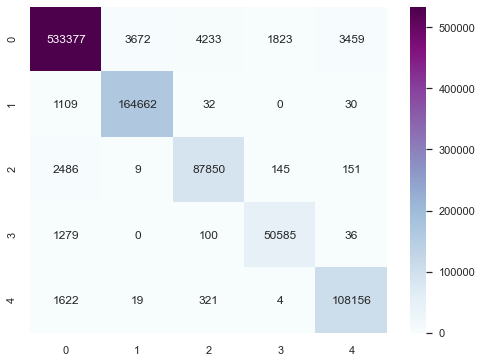

In [63]:
cm = confusion_matrix(y_test, shortChest_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.BuPu );

C:\Users\kssin\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


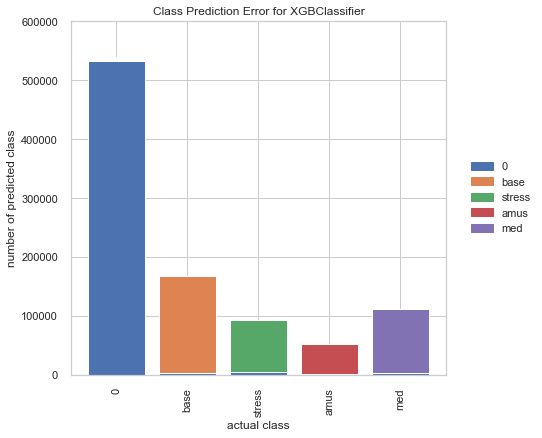

In [64]:
sns.set(style="whitegrid")
Classes = ['0', 'base', 'stress', 'amus', 'med']
error = ClassPredictionError(shortChest, size=(620, 450), classes=Classes)
error.score(x_test, y_test)
e = error.poof()

In [65]:
def multiclass_roc_auc_score(y_test, shortChest_pred, average = 'macro'): #(None, 'micro', 'macro', 'weighted', 'samples')
    xg = preprocessing.LabelBinarizer()
    xg.fit(y_test)
    y_test1 = xg.transform(y_test) 
    y_pred1 = xg.transform(shortChest_pred)
    return roc_auc_score(y_test1, y_pred1, average=average)

aucScore = multiclass_roc_auc_score(y_test, shortChest_pred)

print('All Chest less EMG')
print('-------------------')
print("AUC: %.2f%%" % (aucScore*100))  

All Chest less EMG
-------------------
AUC: 98.61%


#### KNN + Cross Validation + K=5 + Normalization [ CV = 20, K = 5 ]

In [66]:
Q1 = ch_short.quantile(0.25)
Q3 = ch_short.quantile(0.75)
IQR = Q3 - Q1

In [67]:
ch_short_out = ch_short[~((ch_short < (ch_short - 1.5 * IQR)) |(ch_short > (Q3 + 1.5 * IQR))).any(axis=1)]
print(ch_short_out.shape)

(4067396, 8)


In [68]:
#mean normalization 
norm_ch_short_out=(ch_short_out-ch_short_out.mean())/ch_short_out.std()
norm_y = ch_short_out.w_label #keep original labels Dont normalize labels
norm_x = norm_ch_short_out.drop('w_label',axis=1)

norm_x_train,norm_x_test,norm_y_train,norm_y_test=train_test_split(norm_x,norm_y,test_size=0.2)

In [69]:
X_1 = sm.add_constant(norm_x)
#Fitting sm.OLS model
model = sm.OLS(norm_y,X_1).fit()
model.pvalues

const      0.000000e+00
c_ax       0.000000e+00
c_ay       0.000000e+00
c_az       0.000000e+00
c_eda      0.000000e+00
c_temp     0.000000e+00
c_resp    1.158278e-191
c_ecg      1.002928e-75
dtype: float64

In [70]:
knn = KNeighborsClassifier(n_neighbors=5)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=20)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9377    0.8885    0.9124   2105144
         1.0     0.9163    0.9494    0.9325    779563
         2.0     0.8489    0.9363    0.8905    411851
         3.0     0.8236    0.9065    0.8631    247601
         4.0     0.8912    0.9170    0.9039    523237

    accuracy                         0.9098   4067396
   macro avg     0.8836    0.9195    0.9005   4067396
weighted avg     0.9117    0.9098    0.9100   4067396



#### QDA + Normalization + Cross Validation = 10

In [71]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0)
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.8947    0.8330    0.8628   2105144
         1.0     0.7355    0.8344    0.7818    779563
         2.0     0.9035    0.9190    0.9112    411851
         3.0     0.8022    0.8607    0.8304    247601
         4.0     0.8985    0.9243    0.9112    523237

    accuracy                         0.8554   4067396
   macro avg     0.8469    0.8743    0.8595   4067396
weighted avg     0.8599    0.8554    0.8564   4067396



### Model ACC TEMP EDA

#### XGBoost

In [72]:
less_Emg_Ecg = c_loc[['c_eda', 'c_temp', 'c_ax', 'c_ay', 'c_az', 'w_label']]
y = less_Emg_Ecg.w_label
x = less_Emg_Ecg.drop('w_label',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
evalSet = [(x_train, y_train), (x_test, y_test)] 

print(x_train.shape)
print(y_test.shape)

(3860639, 5)
(965160,)


In [73]:
accEdaTemp = XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, early_stopping_rounds = 20, alpha = 10, n_estimators = 300, gradient_based = 0.1, gamma=3, verbosity = 2)  

model_accEdaTemp = accEdaTemp.fit(x_train,y_train,
                                 eval_metric='merror',
                                 eval_set = evalSet)

C:\Users\kssin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[17:54:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gradient_based" } are not used.

[17:54:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 288 extra nodes, 16 pruned nodes, max_depth=10
[17:54:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 150 extra nodes, 44 pruned nodes, max_depth=10
[17:54:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 86 extra nodes, 24 pruned nodes, max_depth=9
[17:54:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgbo

[17:55:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 130 extra nodes, 24 pruned nodes, max_depth=10
[6]	validation_0-merror:0.16472	validation_1-merror:0.16532
[17:55:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 164 extra nodes, 18 pruned nodes, max_depth=10
[17:55:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 32 pruned nodes, max_depth=10
[17:55:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 76 extra nodes, 20 pruned nodes, max_depth=10
[17:55:22] INFO: C:/buildkite-age

[17:56:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 114 extra nodes, 50 pruned nodes, max_depth=9
[13]	validation_0-merror:0.12186	validation_1-merror:0.12239
[17:56:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 146 extra nodes, 88 pruned nodes, max_depth=10
[17:56:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 92 extra nodes, 40 pruned nodes, max_depth=10
[17:56:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 14 pruned nodes, max_depth=8
[17:56:19] INFO: C:/buildkite-agent

[17:57:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 194 extra nodes, 28 pruned nodes, max_depth=10
[20]	validation_0-merror:0.09034	validation_1-merror:0.09033
[17:57:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 120 extra nodes, 90 pruned nodes, max_depth=10
[17:57:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 86 extra nodes, 50 pruned nodes, max_depth=10
[17:57:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 22 pruned nodes, max_depth=10
[17:57:18] INFO: C:/buildkite-age

[17:58:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 102 extra nodes, 44 pruned nodes, max_depth=10
[27]	validation_0-merror:0.07289	validation_1-merror:0.07260
[17:58:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 58 pruned nodes, max_depth=10
[17:58:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 84 extra nodes, 60 pruned nodes, max_depth=10
[17:58:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 94 extra nodes, 52 pruned nodes, max_depth=10
[17:58:18] INFO: C:/buildkite-age

[17:59:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 86 extra nodes, 54 pruned nodes, max_depth=9
[34]	validation_0-merror:0.06319	validation_1-merror:0.06266
[17:59:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 112 extra nodes, 38 pruned nodes, max_depth=10
[17:59:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 224 extra nodes, 78 pruned nodes, max_depth=10
[17:59:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 34 pruned nodes, max_depth=7
[17:59:16] INFO: C:/buildkite-agent

[18:00:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 164 extra nodes, 44 pruned nodes, max_depth=10
[41]	validation_0-merror:0.05336	validation_1-merror:0.05301
[18:00:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 102 pruned nodes, max_depth=9
[18:00:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 70 pruned nodes, max_depth=9
[18:00:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 82 extra nodes, 54 pruned nodes, max_depth=10
[18:00:12] INFO: C:/buildkite-agent

[18:01:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 22 pruned nodes, max_depth=8
[48]	validation_0-merror:0.04889	validation_1-merror:0.04855
[18:01:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 100 extra nodes, 54 pruned nodes, max_depth=8
[18:01:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 74 pruned nodes, max_depth=9
[18:01:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 24 pruned nodes, max_depth=8
[18:01:08] INFO: C:/buildkite-agent/bu

[18:01:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 18 pruned nodes, max_depth=7
[55]	validation_0-merror:0.04665	validation_1-merror:0.04623
[18:02:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 96 extra nodes, 68 pruned nodes, max_depth=9
[18:02:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 56 pruned nodes, max_depth=8
[18:02:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 26 pruned nodes, max_depth=9
[18:02:05] INFO: C:/buildkite-agent/bui

[18:02:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 134 extra nodes, 46 pruned nodes, max_depth=10
[62]	validation_0-merror:0.04444	validation_1-merror:0.04393
[18:02:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 114 pruned nodes, max_depth=8
[18:03:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 66 pruned nodes, max_depth=8
[18:03:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 36 pruned nodes, max_depth=5
[18:03:04] INFO: C:/buildkite-agent/

[18:03:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 36 pruned nodes, max_depth=10
[69]	validation_0-merror:0.04283	validation_1-merror:0.04244
[18:03:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 82 extra nodes, 108 pruned nodes, max_depth=10
[18:03:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 218 extra nodes, 104 pruned nodes, max_depth=10
[18:03:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 188 extra nodes, 34 pruned nodes, max_depth=10
[18:04:00] INFO: C:/buildkite-

[18:04:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 96 pruned nodes, max_depth=7
[76]	validation_0-merror:0.04091	validation_1-merror:0.04047
[18:04:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 334 extra nodes, 86 pruned nodes, max_depth=10
[18:04:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 44 pruned nodes, max_depth=7
[18:04:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 30 pruned nodes, max_depth=8
[18:04:55] INFO: C:/buildkite-agent/b

[18:05:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 78 pruned nodes, max_depth=8
[83]	validation_0-merror:0.03927	validation_1-merror:0.03890
[18:05:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 132 pruned nodes, max_depth=10
[18:05:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 40 pruned nodes, max_depth=7
[18:05:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 180 extra nodes, 48 pruned nodes, max_depth=10
[18:05:50] INFO: C:/buildkite-agent

[18:06:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 116 extra nodes, 38 pruned nodes, max_depth=10
[90]	validation_0-merror:0.03741	validation_1-merror:0.03712
[18:06:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 170 pruned nodes, max_depth=8
[18:06:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 164 extra nodes, 148 pruned nodes, max_depth=10
[18:06:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 30 pruned nodes, max_depth=6
[18:06:44] INFO: C:/buildkite-age

[18:07:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 112 extra nodes, 46 pruned nodes, max_depth=10
[97]	validation_0-merror:0.03564	validation_1-merror:0.03538
[18:07:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 172 pruned nodes, max_depth=8
[18:07:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 74 pruned nodes, max_depth=8
[18:07:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 44 pruned nodes, max_depth=6
[18:07:40] INFO: C:/buildkite-agent/

[18:08:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 116 pruned nodes, max_depth=8
[104]	validation_0-merror:0.03417	validation_1-merror:0.03396
[18:08:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 100 extra nodes, 76 pruned nodes, max_depth=10
[18:08:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 28 pruned nodes, max_depth=7
[18:08:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 54 pruned nodes, max_depth=8
[18:08:36] INFO: C:/buildkite-agent

[18:09:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 76 pruned nodes, max_depth=9
[111]	validation_0-merror:0.03318	validation_1-merror:0.03297
[18:09:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 104 pruned nodes, max_depth=7
[18:09:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 48 pruned nodes, max_depth=7
[18:09:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 38 pruned nodes, max_depth=7
[18:09:31] INFO: C:/buildkite-agent/b

[18:10:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 110 pruned nodes, max_depth=8
[118]	validation_0-merror:0.03231	validation_1-merror:0.03216
[18:10:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 116 pruned nodes, max_depth=7
[18:10:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 42 pruned nodes, max_depth=7
[18:10:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 38 pruned nodes, max_depth=7
[18:10:25] INFO: C:/buildkite-agent/

[18:11:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 24 pruned nodes, max_depth=7
[125]	validation_0-merror:0.03115	validation_1-merror:0.03115
[18:11:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 86 pruned nodes, max_depth=8
[18:11:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 52 pruned nodes, max_depth=6
[18:11:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 56 pruned nodes, max_depth=8
[18:11:17] INFO: C:/buildkite-agent/bu

[18:12:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 134 extra nodes, 48 pruned nodes, max_depth=10
[132]	validation_0-merror:0.03037	validation_1-merror:0.03040
[18:12:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 230 extra nodes, 124 pruned nodes, max_depth=10
[18:12:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 110 extra nodes, 106 pruned nodes, max_depth=10
[18:12:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 62 pruned nodes, max_depth=7
[18:12:11] INFO: C:/buildkite-

[18:12:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 38 pruned nodes, max_depth=6
[139]	validation_0-merror:0.02966	validation_1-merror:0.02968
[18:13:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 198 pruned nodes, max_depth=5
[18:13:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 94 pruned nodes, max_depth=7
[18:13:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 70 pruned nodes, max_depth=7
[18:13:04] INFO: C:/buildkite-agent/b

[18:13:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 40 pruned nodes, max_depth=7
[146]	validation_0-merror:0.02902	validation_1-merror:0.02907
[18:13:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 166 pruned nodes, max_depth=7
[18:13:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 80 pruned nodes, max_depth=7
[18:13:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 36 pruned nodes, max_depth=8
[18:13:58] INFO: C:/buildkite-agent/b

[18:14:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 50 pruned nodes, max_depth=7
[153]	validation_0-merror:0.02803	validation_1-merror:0.02807
[18:14:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 78 extra nodes, 80 pruned nodes, max_depth=9
[18:14:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 98 pruned nodes, max_depth=6
[18:14:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 132 extra nodes, 86 pruned nodes, max_depth=10
[18:14:53] INFO: C:/buildkite-agent/

[18:15:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 90 pruned nodes, max_depth=7
[160]	validation_0-merror:0.02737	validation_1-merror:0.02747
[18:15:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 200 extra nodes, 122 pruned nodes, max_depth=10
[18:15:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 94 extra nodes, 92 pruned nodes, max_depth=10
[18:15:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 54 pruned nodes, max_depth=7
[18:15:47] INFO: C:/buildkite-agen

[18:16:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 114 extra nodes, 42 pruned nodes, max_depth=10
[167]	validation_0-merror:0.02671	validation_1-merror:0.02676
[18:16:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 68 pruned nodes, max_depth=9
[18:16:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 90 extra nodes, 72 pruned nodes, max_depth=10
[18:16:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 142 extra nodes, 92 pruned nodes, max_depth=10
[18:16:40] INFO: C:/buildkite-age

[18:17:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 46 pruned nodes, max_depth=7
[174]	validation_0-merror:0.02622	validation_1-merror:0.02627
[18:17:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 184 extra nodes, 138 pruned nodes, max_depth=10
[18:17:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 64 pruned nodes, max_depth=7
[18:17:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 116 extra nodes, 92 pruned nodes, max_depth=10
[18:17:34] INFO: C:/buildkite-age

[18:18:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 96 pruned nodes, max_depth=8
[181]	validation_0-merror:0.02582	validation_1-merror:0.02586
[18:18:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 246 pruned nodes, max_depth=7
[18:18:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 94 pruned nodes, max_depth=6
[18:18:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 134 extra nodes, 74 pruned nodes, max_depth=10
[18:18:28] INFO: C:/buildkite-agent

[18:19:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 104 pruned nodes, max_depth=9
[188]	validation_0-merror:0.02537	validation_1-merror:0.02540
[18:19:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 122 pruned nodes, max_depth=6
[18:19:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 34 pruned nodes, max_depth=7
[18:19:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 100 pruned nodes, max_depth=7
[18:19:21] INFO: C:/buildkite-agent

[18:20:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 94 pruned nodes, max_depth=7
[195]	validation_0-merror:0.02503	validation_1-merror:0.02504
[18:20:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 256 pruned nodes, max_depth=7
[18:20:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 90 pruned nodes, max_depth=7
[18:20:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 120 extra nodes, 94 pruned nodes, max_depth=10
[18:20:14] INFO: C:/buildkite-agent

[18:21:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 78 pruned nodes, max_depth=10
[202]	validation_0-merror:0.02465	validation_1-merror:0.02467
[18:21:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 194 pruned nodes, max_depth=7
[18:21:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 82 pruned nodes, max_depth=6
[18:21:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 116 pruned nodes, max_depth=7
[18:21:08] INFO: C:/buildkite-agen

[18:21:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 96 pruned nodes, max_depth=5
[209]	validation_0-merror:0.02447	validation_1-merror:0.02453
[18:21:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 246 pruned nodes, max_depth=7
[18:21:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 118 pruned nodes, max_depth=7
[18:22:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 136 pruned nodes, max_depth=7
[18:22:02] INFO: C:/buildkite-agent

[18:22:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 58 pruned nodes, max_depth=8
[216]	validation_0-merror:0.02417	validation_1-merror:0.02420
[18:22:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 132 pruned nodes, max_depth=7
[18:22:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 38 pruned nodes, max_depth=7
[18:22:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 94 pruned nodes, max_depth=7
[18:22:55] INFO: C:/buildkite-agent/b

[18:23:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 120 pruned nodes, max_depth=8
[223]	validation_0-merror:0.02369	validation_1-merror:0.02370
[18:23:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 236 pruned nodes, max_depth=5
[18:23:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 80 pruned nodes, max_depth=5
[18:23:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 78 pruned nodes, max_depth=10
[18:23:51] INFO: C:/buildkite-agen

[18:24:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 56 pruned nodes, max_depth=7
[230]	validation_0-merror:0.02337	validation_1-merror:0.02339
[18:24:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 90 pruned nodes, max_depth=7
[18:24:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 84 extra nodes, 112 pruned nodes, max_depth=10
[18:24:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 122 extra nodes, 78 pruned nodes, max_depth=10
[18:24:44] INFO: C:/buildkite-agen

[18:25:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 84 pruned nodes, max_depth=8
[237]	validation_0-merror:0.02308	validation_1-merror:0.02314
[18:25:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 144 extra nodes, 184 pruned nodes, max_depth=10
[18:25:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 108 pruned nodes, max_depth=6
[18:25:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 32 pruned nodes, max_depth=8
[18:25:38] INFO: C:/buildkite-agen

[18:26:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 126 pruned nodes, max_depth=8
[244]	validation_0-merror:0.02280	validation_1-merror:0.02283
[18:26:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 74 pruned nodes, max_depth=10
[18:26:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 114 pruned nodes, max_depth=10
[18:26:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 108 pruned nodes, max_depth=6
[18:26:32] INFO: C:/buildkite-age

[18:27:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 48 pruned nodes, max_depth=8
[251]	validation_0-merror:0.02255	validation_1-merror:0.02260
[18:27:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 256 pruned nodes, max_depth=6
[18:27:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 126 pruned nodes, max_depth=7
[18:27:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 110 pruned nodes, max_depth=5
[18:27:25] INFO: C:/buildkite-agent

[18:28:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 154 pruned nodes, max_depth=7
[258]	validation_0-merror:0.02222	validation_1-merror:0.02226
[18:28:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 102 pruned nodes, max_depth=6
[18:28:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 102 pruned nodes, max_depth=5
[18:28:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 34 pruned nodes, max_depth=8
[18:28:18] INFO: C:/buildkite-agent

[18:29:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 132 pruned nodes, max_depth=7
[265]	validation_0-merror:0.02212	validation_1-merror:0.02216
[18:29:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 82 pruned nodes, max_depth=8
[18:29:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 96 pruned nodes, max_depth=5
[18:29:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 80 pruned nodes, max_depth=6
[18:29:12] INFO: C:/buildkite-agent/b

[18:30:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 118 pruned nodes, max_depth=7
[272]	validation_0-merror:0.02189	validation_1-merror:0.02195
[18:30:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 268 pruned nodes, max_depth=5
[18:30:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 142 pruned nodes, max_depth=9
[18:30:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 54 pruned nodes, max_depth=6
[18:30:06] INFO: C:/buildkite-agent

[18:30:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 50 pruned nodes, max_depth=4
[279]	validation_0-merror:0.02165	validation_1-merror:0.02173
[18:30:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 128 extra nodes, 174 pruned nodes, max_depth=10
[18:30:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 154 pruned nodes, max_depth=9
[18:30:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 118 pruned nodes, max_depth=6
[18:31:00] INFO: C:/buildkite-age

[18:31:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 150 pruned nodes, max_depth=5
[286]	validation_0-merror:0.02151	validation_1-merror:0.02160
[18:31:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 116 pruned nodes, max_depth=7
[18:31:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 146 pruned nodes, max_depth=9
[18:31:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 106 extra nodes, 106 pruned nodes, max_depth=10
[18:31:54] INFO: C:/buildkite-ag

[18:32:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 132 pruned nodes, max_depth=7
[293]	validation_0-merror:0.02135	validation_1-merror:0.02147
[18:32:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 250 pruned nodes, max_depth=6
[18:32:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 62 pruned nodes, max_depth=7
[18:32:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 130 pruned nodes, max_depth=6
[18:32:48] INFO: C:/buildkite-agent

In [74]:
accEdaTemp_pred = accEdaTemp.predict(x_test)
accEdaTemp_report = (classification_report(y_test, 
                                         accEdaTemp_pred, 
                                         labels = np.unique(accEdaTemp_pred),
                                         digits = 4))

print('Balanced Accuracy:', balanced_accuracy_score(y_test, accEdaTemp_pred))
print('---------------------------------------')
print('------------ACC EDA TEMP Classification Report------------')
print(accEdaTemp_report)

Balanced Accuracy: 0.978153481750207
---------------------------------------
------------ACC EDA TEMP Classification Report------------
              precision    recall  f1-score   support

           0     0.9878    0.9762    0.9820    546736
           1     0.9784    0.9926    0.9854    165150
           2     0.9482    0.9697    0.9588     91333
           3     0.9628    0.9709    0.9669     52040
           4     0.9678    0.9814    0.9746    109901

    accuracy                         0.9787    965160
   macro avg     0.9690    0.9782    0.9735    965160
weighted avg     0.9788    0.9787    0.9787    965160



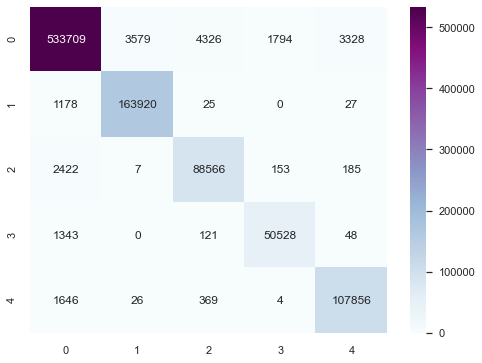

In [75]:
cm = confusion_matrix(y_test, accEdaTemp_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.BuPu);

C:\Users\kssin\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


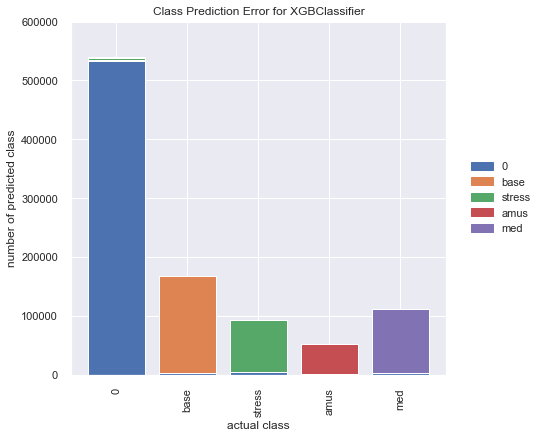

In [76]:
sns.set(style="darkgrid")
Classes = ['0', 'base', 'stress', 'amus', 'med']
error = ClassPredictionError(accEdaTemp, size=(620, 450), classes=Classes)
error.score(x_test, y_test)
e = error.poof()

In [77]:
def multiclass_roc_auc_score(y_test, accEdaTemp_pred, average = 'macro'): #(None, 'micro', 'macro', 'weighted', 'samples')
    xg = preprocessing.LabelBinarizer()
    xg.fit(y_test)
    y_test1 = xg.transform(y_test) 
    y_pred1 = xg.transform(accEdaTemp_pred)
    return roc_auc_score(y_test1, y_pred1, average=average)

aucScore = multiclass_roc_auc_score(y_test, accEdaTemp_pred)

print('ACC EDA TEMP')
print('-------------------')
print("AUC: %.2f%%" % (aucScore*100))

ACC EDA TEMP
-------------------
AUC: 98.59%


In [78]:
Q1 = less_Emg_Ecg.quantile(0.25)
Q3 = less_Emg_Ecg.quantile(0.75)
IQR = Q3 - Q1

In [79]:
less_Emg_Ecg_out = less_Emg_Ecg[~((less_Emg_Ecg < (less_Emg_Ecg - 1.5 * IQR)) |(less_Emg_Ecg > (Q3 + 1.5 * IQR))).any(axis=1)]
print(less_Emg_Ecg_out.shape)

(4399129, 6)


In [80]:
norm_less_Emg_Ecg_out=(less_Emg_Ecg_out-less_Emg_Ecg_out.mean())/less_Emg_Ecg_out.std()
norm_y = less_Emg_Ecg_out.w_label #keep original labels Dont normalize labels
norm_x = norm_less_Emg_Ecg_out.drop('w_label',axis=1)

norm_x_train,norm_x_test,norm_y_train,norm_y_test=train_test_split(norm_x,norm_y,test_size=0.2)

In [81]:
X_1 = sm.add_constant(norm_x)
#Fitting sm.OLS model
model = sm.OLS(norm_y,X_1).fit()
model.pvalues

const     0.0
c_eda     0.0
c_temp    0.0
c_ax      0.0
c_ay      0.0
c_az      0.0
dtype: float64

#### KNN + Cross Validation + K=5 + Normalization [ CV = 20, K = 5 ]

In [82]:
knn = KNeighborsClassifier(n_neighbors=5)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=20)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9298    0.9007    0.9150   2311808
         1.0     0.9173    0.9437    0.9303    821342
         2.0     0.8630    0.9243    0.8926    454680
         3.0     0.8323    0.9011    0.8653    260399
         4.0     0.9097    0.9015    0.9056    550900

    accuracy                         0.9113   4399129
   macro avg     0.8904    0.9142    0.9018   4399129
weighted avg     0.9123    0.9113    0.9114   4399129



#### QDA + Normalization + Cross Validation = 10

In [83]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0)
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.8970    0.8346    0.8647   2311808
         1.0     0.7328    0.8318    0.7792    821342
         2.0     0.8993    0.9171    0.9081    454680
         3.0     0.7995    0.8580    0.8277    260399
         4.0     0.8895    0.9245    0.9066    550900

    accuracy                         0.8553   4399129
   macro avg     0.8436    0.8732    0.8573   4399129
weighted avg     0.8599    0.8553    0.8563   4399129

